# 1. Setting Up the Environment

In [1]:
#!pip install gym_super_mario_bros==7.3.0 nes_py

  Using cached gym_super_mario_bros-7.3.0-py2.py3-none-any.whl (198 kB)
  Using cached nes_py-8.2.1-cp310-cp310-macosx_10_9_x86_64.whl
  Using cached gym-0.24.1-py3-none-any.whl
  Using cached pyglet-1.5.21-py3-none-any.whl (1.1 MB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached numpy-1.23.1-cp310-cp310-macosx_10_9_x86_64.whl (18.1 MB)
  Using cached gym_notices-0.0.7-py3-none-any.whl (2.7 kB)
  Using cached cloudpickle-2.1.0-py3-none-any.whl (25 kB)


In [1]:
# Import the game
import gym_super_mario_bros

# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace

# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Set Up Fame

env = gym_super_mario_bros.make("SuperMarioBros-v0")
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [22]:
# Create a flag - restart or not
done = True

# Loop through each frame in the game
for step in range(100000):
    # Start the game to begin with
    if done:
        #Start the game
        env.reset()
    
    #Do Random actions
    state, reward, done, info = env.step(env.action_space.sample())
    
    # Show the game on the screen
    env.render()

# Close the game
env.close()

KeyboardInterrupt: 

In [9]:
env.reset()

array([[[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       ...,

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [  0,   0,   0]],

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [228,  92,  16]]

# 2. Preprocess Environment

In [3]:
# Imstall baselines3 (training AI Model Algo) 
# conda install -c conda-forge stable-baselines3
#!pip install 'stable-baselines3[extra]'

In [4]:
# Install pytorch 
# conda install pytorch torchvision torchaudio -c pytorch
#!pip install torch torchvision torchaudio

In [12]:
# Fix no module found "cv2"

#!pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-macosx_10_15_x86_64.whl (56.1 MB)


In [5]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation

# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

# Import Matplotlib to show the imack of frame stacking
from matplotlib import pyplot as plt

/Users/junpoh/opt/anaconda3/envs/mario/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# 1. Create Base environemnt
env = gym_super_mario_bros.make("SuperMarioBros-v0")

# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# 3. Grayscale
env = GrayScaleObservation(env, keep_dim = True)

# 4. Wrap inside the dummy environment
env = DummyVecEnv([lambda:env])

# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order = 'last')

In [7]:
state = env.reset()

In [8]:
state.shape

(1, 240, 256, 4)

In [9]:
state, reward, done, info = env.step([5])

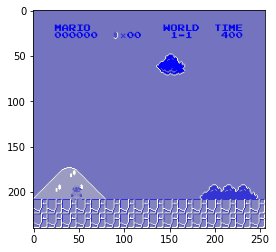

In [10]:
plt.imshow(state[0])

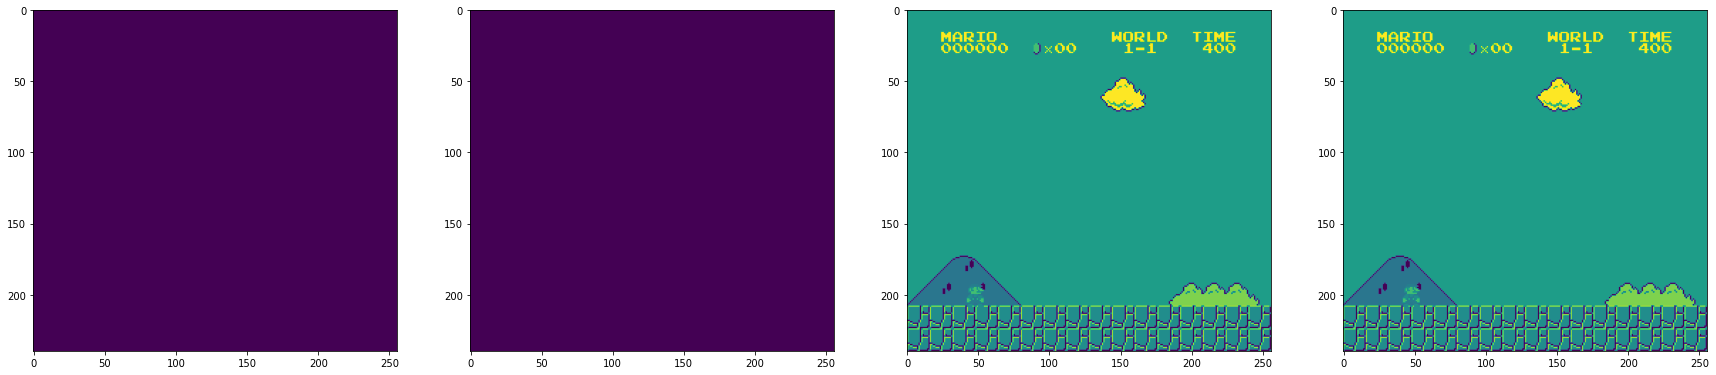

In [11]:
plt.figure(figsize=(30,26))
for idx in range(state.shape[3]):
           plt.subplot(1,4, idx+1)
           plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model

In [12]:
# Import os for file path management
import os

# Import PPO for algos
from stable_baselines3 import PPO

# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [13]:
class TrainAndLoggingCallback(BaseCallback):
    
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        
    def __init__callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)
            
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}',format(self.n_calls))
            self.model.save(model_path)
            
        return True
            

In [14]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [15]:
# Setup model saving callback 

callback = TrainAndLoggingCallback(check_freq=10000, save_path = CHECKPOINT_DIR)

In [16]:
# This is the AI Model started

model = PPO('CnnPolicy', env , verbose = 1, tensorboard_log = LOG_DIR, learning_rate = 0.000001, 
            n_steps = 512)


Using cpu device
Wrapping the env in a VecTransposeImage.


In [ ]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps = 1000000, callback = callback)

Logging to ./logs/PPO_4


/Users/junpoh/opt/anaconda3/envs/mario/lib/python3.10/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 82  |
|    iterations      | 1   |
|    time_elapsed    | 6   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 2             |
|    time_elapsed         | 78            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 8.7533845e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00495       |
|    learning_rate        | 1e-06         |
|    loss                 | 142           |
|    n_updates            | 10            |
|    policy_gradient_loss | -8.39e-05     |
|    value_loss           | 428           |
-------------------------------------------
-----

# 4. Test it Out

In [18]:
# Load the model
model = PPO.load('./train/best_model_{}/510000')

In [19]:
# Start the game
state = env.reset()

# Loop through the game
while True: 
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()
    
    

KeyboardInterrupt: 